In [47]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 6.5.2 Ridge Regression and The Lasso

### Ridge Regression

In [2]:
hitters = pd.read_csv('../data/hitters.csv')
hitters.dropna(axis=0, inplace=True)
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
hitters.shape

(263, 20)

In [4]:
# get dummy variables
hitters['League'] = pd.get_dummies(hitters['League']).iloc[:, 0]
hitters['Division'] = pd.get_dummies(hitters['Division']).iloc[:, 0]
hitters['NewLeague'] = pd.get_dummies(hitters['NewLeague']).iloc[:, 0]

In [5]:
X = hitters.drop(['Salary'], axis=1)
y = hitters.Salary

In [10]:
alphas = 10**np.linspace(10, -2, 100)

models = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, fit_intercept=True)
    model = ridge.fit(scale(X), y)
    models.append(model)

In [28]:
# alpha value of 50th model
models[49].alpha

11497.569953977356

In [42]:
coef = pd.Series(models[49].coef_.flatten(), index=X.columns)
coef

AtBat        3.494574
Hits         3.952735
HmRun        2.983900
Runs         3.754690
RBI          3.981076
Walks        3.991857
Years        3.461209
CAtBat       4.617142
CHits        4.848250
CHmRun       4.625988
CRuns        4.969938
CRBI         5.008957
CWalks       4.275527
League       0.034223
Division     1.877802
PutOuts      2.837986
Assists      0.236442
Errors      -0.069616
NewLeague   -0.048489
dtype: float64

In [25]:
# l2 norm of coef. estimations for 50th model
np.sqrt(np.sum(np.power(coef[1], 2)))

3.9527351768344565

In [29]:
# alpha value of 60th model
models[59].alpha

705.4802310718645

In [43]:
# coefficient estimations of 60th model
coef2 = pd.Series(models[59].coef_.flatten(), index=X.columns)
coef2

AtBat        16.436909
Hits         24.147890
HmRun        11.541520
Runs         20.796881
RBI          19.997243
Walks        23.885453
Years        13.478743
CAtBat       22.482103
CHits        25.850293
CHmRun       23.990950
CRuns        26.454467
CRBI         26.819732
CWalks       18.862008
League       -4.294669
Division     19.598632
PutOuts      24.649574
Assists       1.677569
Errors       -2.602909
NewLeague    -3.190716
dtype: float64

As we decrease `alpha`, Ridge coefficients get larger. You can see the coefficient values of 50th and 60th models' coefficient estimates. The plot below shows the impact of value of the alpha parameter on ridge coefficients.

Text(0, 0.5, 'Coefs')

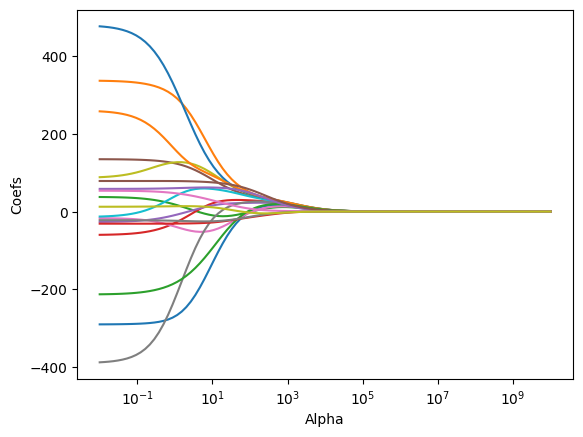

In [37]:
coefs = [model.coef_ for model in models]

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefs')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

scaler = StandardScaler().fit(X_train)

In [44]:
# alpha = 4
ridge2 = Ridge(alpha=4, fit_intercept=True)
ridge2.fit(scaler.transform(X_train), y_train)
pred = ridge2.predict(scaler.transform(X_test))
mean_squared_error(y_test, pred)

102144.52395076505

In [45]:
# alpha = 10**10
ridge3 = Ridge(alpha=10**10, fit_intercept=True)
ridge3.fit(scaler.transform(X_train), y_train)
pred = ridge3.predict(scaler.transform(X_test))
mean_squared_error(y_test, pred)

172862.22059245987

So fitting a ridge regression model with λ = 4 leads to a much lower test MSE than fitting a model with just an intercept.

In [46]:
# Least squares regression (alpha = 0)
ridge4 = Ridge(alpha=0, fit_intercept=True)
ridge4.fit(scaler.transform(X_train), y_train)
pred = ridge4.predict(scaler.transform(X_test))
mean_squared_error(y_test, pred)

116690.46856661196

Ridge regression with alpha = 4 has some benefits over least squares regression method. 

#### Ridge Regression with Cross-Validation Method

In general, instead of arbirarily choosing the value of regression parameter, it would be better to use cross-validation to choose. For this operation, we can use `RidgeCV` method which uses `leave-one-out-cv` method. Also we can define the number of folds to make it use `KFold CV`.

In [50]:
ridgecv = RidgeCV(alphas=alphas, cv=10, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

RidgeCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       6.13590727e+00, 4.64158883e+00, 3.51119173e+00, 2.65608778e+00,
       2.00923300e+00, 1.51991108e+00, 1.14975700e+00, 8.69749003e-01,
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        cv=10, scoring='neg_mean_squared_error')

In [51]:
# The value of alpha that results in the smallest cross-validation error is
ridgecv.alpha_

57.2236765935022

In [54]:
# the test MSE associated with the value of alpha given above
ridge5 = Ridge(alpha=ridgecv.alpha_)
ridge5.fit(scale(X_train), y_train)
pred = ridge5.predict(scale(X_test))
mean_squared_error(y_test, pred)

101861.8560519165

In [55]:
pd.Series(ridge5.coef_.flatten(), index=X.columns)

AtBat        -9.369338
Hits         45.000279
HmRun        -6.866031
Runs         17.720354
RBI          36.368712
Walks        52.224620
Years         2.517150
CAtBat       11.940166
CHits        35.873949
CHmRun       49.723702
CRuns        36.456755
CRBI         49.346548
CWalks       22.828424
League      -10.775236
Division     49.958705
PutOuts      91.316924
Assists      -2.063318
Errors       -3.384942
NewLeague    -4.360527
dtype: float64

### The Lasso

In [57]:
# changed max_iter parameter because model does not converge with default value of max_iter
# default alpha = 1
lasso = Lasso(max_iter=10000)

lasso.fit(scale(X_train), y_train)
pred = lasso.predict(scale(X_test))
mean_squared_error(y_test, pred)

107410.95617334296

#### The Lasso with Cross-Validation Method

In [64]:
lassocv = LassoCV(alphas=alphas, cv=10, max_iter=10000)
lassocv.fit(scale(X_train), y_train)

LassoCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       6.13590727e+00, 4.64158883e+00, 3.51119173e+00, 2.65608778e+00,
       2.00923300e+00, 1.51991108e+00, 1.14975700e+00, 8.69749003e-01,
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        cv=10, max_iter=10000)

In [65]:
# The value of alpha that results in the smallest cross-validation error is
lassocv.alpha_

24.77076355991714

In [66]:
# the test MSE associated with the value of alpha given above
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
pred = lasso.predict(scale(X_test))
mean_squared_error(y_test, pred)

106351.89287363879

This is substantially lower than the test set MSE of the null model and of least squares, and very similar to the test MSE of ridge regression with `alpha` chosen by cross-validation.

In [70]:
pd.Series(lasso.coef_.flatten(), index=X.columns)

AtBat          0.000000
Hits          51.230050
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks         67.810509
Years          0.000000
CAtBat         0.000000
CHits          0.000000
CHmRun        20.509057
CRuns          0.000000
CRBI         182.427947
CWalks         0.000000
League        -0.000000
Division      47.166902
PutOuts      111.640585
Assists       -0.000000
Errors        -0.000000
NewLeague     -0.000000
dtype: float64

The lasso has a substantial advantage over ridge regression in that the resulting coefficient estimates are sparse. Here we see that 13 of the 19 coefficient estimates are exactly zero.

In [72]:
models = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, fit_intercept=True, max_iter=10000)
    model = lasso.fit(scale(X), y)
    models.append(model)

Text(0, 0.5, 'Coefs')

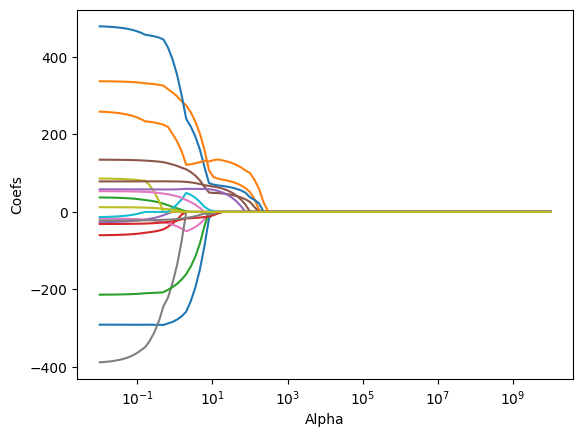

In [73]:
coefs = [model.coef_ for model in models]

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefs')